In [1]:
import torch
import numpy as np
from matplotlib import pyplot as plt
from sbi import analysis

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-05-24 13:56:22.756269: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
true_samples = np.zeros((10000, 2))
for round in range(10):
    filename = f'simulated_data/power_law/posterior_samples_AMHMCMC_{round}.npy'
    true_samples[round*1000:(round+1)*1000] = np.load(filename)

(<Figure size 360x360 with 4 Axes>,
 array([[<AxesSubplot:xlabel='dim 1'>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:xlabel='dim 2'>]], dtype=object))

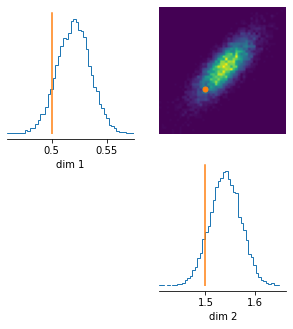

In [92]:
analysis.pairplot(
    true_samples, figsize=(5, 5),
    points=[[0.5,1.5]])

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Drawing 10000 posterior samples: 100%|██████████| 10000/10000 [00:01<00:00, 9522.48it/s]


(<Figure size 360x360 with 4 Axes>,
 array([[<AxesSubplot:xlabel='dim 1'>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:xlabel='dim 2'>]], dtype=object))

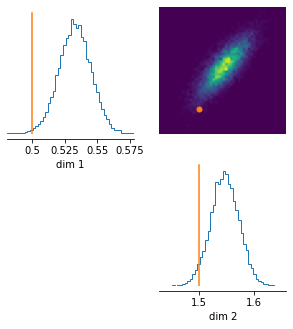

In [93]:
from get_raw_data import simulate_simple
from spectralcomponents import PowerLaw, Spectrum


posterior = torch.load('simulated_data/power_law/sequentialv2/posteriorsequentialSNPE_chunk10_power_law.pt')
x0 = np.load('simulated_data/power_law/x0_power_law.npy')
samples = posterior.set_default_x(x0).sample(
    (10000,), x=x0, )#thin=1, method='slice_np_vectorized')
analysis.pairplot(
    samples,points=[[0.5,1.5]], figsize=(5, 5),
    #limits=[[0.1,2],[0.1,2]]


)

Drawing 10000 posterior samples: 100%|██████████| 10000/10000 [00:00<00:00, 13757.31it/s]


(<Figure size 360x360 with 4 Axes>,
 array([[<AxesSubplot:xlabel='dim 1'>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:xlabel='dim 2'>]], dtype=object))

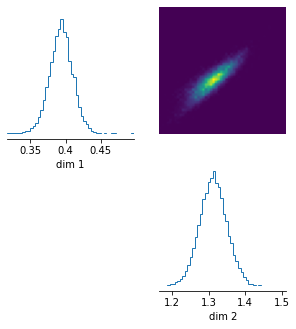

In [97]:
c1 = PowerLaw()
spec = Spectrum(c1)
params = [0.2, 1.0]
x0 = simulate_simple(spec, params)
samples = posterior.set_default_x(x0).sample(
    (10000,), x=x0, )#thin=1, method='slice_np_vectorized')
analysis.pairplot(
    samples,points=[params], figsize=(5, 5),
    #limits=[[0.1,2],[0.1,2]]
)


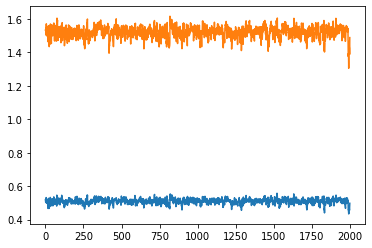

In [25]:
samples = np.array(samples)
plt.plot(samples)

In [8]:
x0 = np.load('simulated_data/power_law/x0_power_law.npy')

(<Figure size 360x360 with 4 Axes>,
 array([[<AxesSubplot:xlabel='dim 1'>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:xlabel='dim 2'>]], dtype=object))

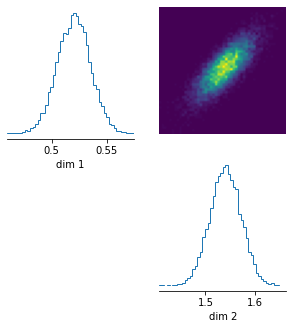

In [6]:
analysis.pairplot(true_samples, figsize=(5, 5))

In [15]:
np.sum(x0)

4498

In [65]:
posterior = torch.load('simulated_data/power_law/posteriorSNlE_1k_sims.pt')

In [75]:
posterior.potential(
    torch.tensor([0.6,1.7]),
    x=torch.tensor(x0))

tensor([-1320.0874])

In [82]:
probs = np.zeros((41,41))
for i, alpha in enumerate(np.linspace(0.2,0.8,41)):
    for j, beta in enumerate(np.linspace(1.2,1.8,41)):
        probs[i, j] = posterior.potential(
            torch.tensor([alpha,beta],dtype=torch.float32),
            x=torch.tensor(x0)).item()

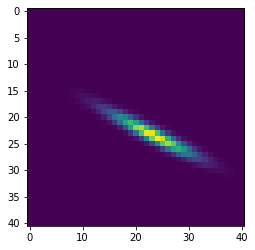

In [86]:
plt.imshow(np.exp(probs - np.max(probs)))

In [84]:
probs

array([[-1378.92321777, -1382.46008301, -1386.13098145, ...,
        -1566.55737305, -1571.94567871, -1577.30944824],
       [-1371.07958984, -1374.42651367, -1377.91943359, ...,
        -1556.44848633, -1561.82885742, -1567.18457031],
       [-1363.66259766, -1366.79199219, -1370.08068848, ...,
        -1546.31311035, -1551.68249512, -1557.02746582],
       ...,
       [-2136.46899414, -2085.40356445, -2037.20410156, ...,
        -1360.51611328, -1356.78356934, -1353.4296875 ],
       [-2216.36206055, -2161.37451172, -2109.45288086, ...,
        -1371.86535645, -1367.43066406, -1363.39794922],
       [-2301.4831543 , -2242.35302734, -2186.49951172, ...,
        -1384.81262207, -1379.6439209 , -1374.90100098]])

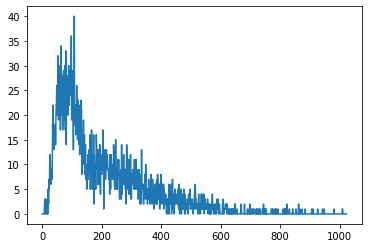

In [98]:
plt.plot(x0)